In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [247]:
# chargement et affichage des données
data = pd.read_csv('personnes.csv')
data.head(20)

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prenom          7 non-null      object
 1   email           7 non-null      object
 2   date_naissance  6 non-null      object
 3   pays            6 non-null      object
 4   taille          7 non-null      object
dtypes: object(5)
memory usage: 408.0+ bytes


### Détecter les valeurs manquantes

In [249]:
data.isnull().sum()

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64

In [250]:
data[data['date_naissance'].isnull()]

,prenom,email,date_naissance,pays,taille
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [251]:
data[data.isnull().any(axis=1)]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


### Comprendre les axes

In [252]:
A=np.random.randint(0,10,(3,3))
A

array([[3, 1, 8],
       [6, 0, 0],
       [2, 3, 0]])

In [253]:
B=np.random.randint(0,10,(3,3))
B

array([[6, 2, 9],
       [2, 2, 4],
       [8, 9, 9]])

In [254]:
# Concaténer selon l'axe 0 --> ajoute verticalement les 2 matrices --> suivant l'axe des colonnes --> axe 0

In [255]:
np.concatenate((A,B), axis=0)

array([[3, 1, 8],
       [6, 0, 0],
       [2, 3, 0],
       [6, 2, 9],
       [2, 2, 4],
       [8, 9, 9]])

In [256]:
# Concaténer selon l'axe 1 --> ajoute horizontalement les 2 matrices --> suivant l'axe des colonnes --> axe 1

In [257]:
np.concatenate((A,B), axis=1)

array([[3, 1, 8, 6, 2, 9],
       [6, 0, 0, 2, 2, 4],
       [2, 3, 0, 8, 9, 9]])

Donc dans notre cas précédent, on affiche les valeurs nulles suivant l'axe des lignes, l'axe 1

### Suite

In [258]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


## affiche les doublons

In [259]:
data.loc[data['email'].duplicated(keep=False), :]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


## modifier les pays selon une liste

In [260]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne'
                  , 'USA']
VALID_COUNTRIES

['France', "Côte d'ivoire", 'Madagascar', 'Bénin', 'Allemagne', 'USA']

In [261]:
for pays, index in zip(data['pays'], range(len(data['pays']))):
    if pays not in VALID_COUNTRIES :
        data['pays'][index] = np.NaN

## traiter les email

In [262]:
data['email']=data['email'].str.split(',', expand=True)[0]

In [263]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [264]:
data['taille']=data['taille'].str[:-1]

In [265]:
data['taille'].astype('float64', errors='ignore')

0    1.49
1    1.67
2    153c
3    1.65
4    1.34
5    3.45
6    1.45
Name: taille, dtype: object

In [266]:
data['taille'][2]=1.53

In [267]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.53
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prenom          7 non-null      object
 1   email           7 non-null      object
 2   date_naissance  6 non-null      object
 3   pays            5 non-null      object
 4   taille          7 non-null      object
dtypes: object(5)
memory usage: 408.0+ bytes


## traiter les dates

In [269]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'], 
                                           format='%d/%m/%Y', errors='coerce')

In [270]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.53
3,Marc,marco23@example.com,1978-02-10,France,1.65
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,3.45
6,samuël,samuel_329@example.com,NaT,Bénin,1.45


## import fichier course

In [271]:
data2=pd.read_csv('course+-+Quiz+P2.csv')

In [272]:
data2['Dept'].unique()

array([76, 27, 14, 78], dtype=int64)

In [273]:
data2[data2.isnull().any(axis=1)]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
73,74,M,00:42:05,14,780125,NaN
109,110,NaN,00:44:39,27,780279,53.0
133,134,M,00:45:46,76,780346,NaN
190,191,M,00:49:52,27,780592,NaN
231,232,M,00:53:11,76,780791,NaN
291,292,NaN,00:59:16,27,781156,66.0


In [274]:
data2.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Length: 340, dtype: bool

In [275]:
data2.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64

In [276]:
# pour ne garder que les variables qualitatives
data2.describe(include='O')

,Sexe,Temps
count,338,340
unique,3,300
top,M,00:50:07
freq,244,3


In [277]:
data2['Sexe'].unique()

array(['M', 'F', 'O', nan], dtype=object)

In [278]:
data2.loc[data2['Sexe'].isnull(), :]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
109,110,NaN,00:44:39,27,780279,53.0
291,292,NaN,00:59:16,27,781156,66.0


## Fichier Opération

In [279]:
data3=pd.read_csv('operations.csv')
data3

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


## Nettoyer le jeu de données

### Valeurs manquantes

In [280]:
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data3.loc[data3['montant'].isnull(),:]

# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data3.loc[index, 'montant'] = data3.loc[index+1, 'solde_avt_ope'] - data3.loc[index, 'solde_avt_ope']

In [281]:
data3.loc[data3['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [282]:
data3.loc[data3['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'

### Doublons

In [283]:
data3.loc[data3[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]
data3.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

### Outliers

In [284]:
i = data3.loc[data3['montant']==-15000,:].index[0] # récupération de l'index de la transaction à -15000

data3.iloc[i-1:i+2,:] # on regarde la transaction précédente et la suivante

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [285]:
data3.loc[data3['montant']==-15000, 'montant'] = -14.39

In [286]:
data3.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,2.872565,3395.301071
std,176.089858,667.109412
min,-602.270000,1416.810000
25%,-20.047500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


## Début Analyse

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

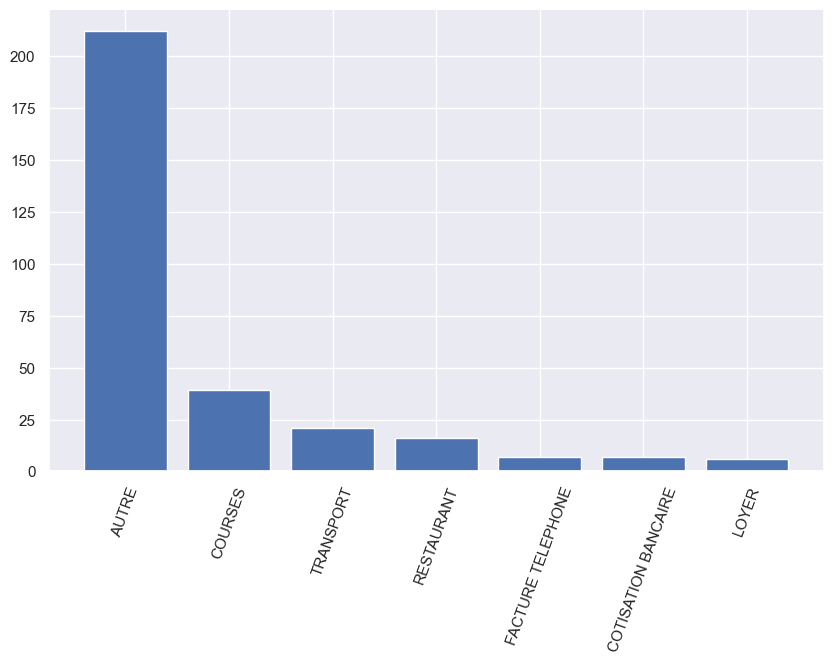

In [287]:
plt.figure(figsize=(10,6))
plt.bar(x=data3['categ'].value_counts().index, height=data3['categ'].value_counts().values)
plt.xticks(rotation=70)

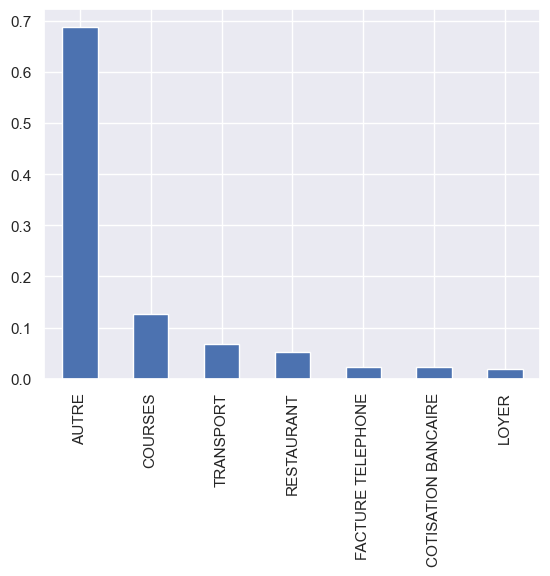

In [288]:
data3["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [289]:
data3.describe(include='all')

,date_operation,libelle,montant,solde_avt_ope,categ
count,308,308,308.000000,308.000000,308
unique,113,30,NaN,NaN,7
top,2023-07-03,CARTE XX XX XX XX XX,NaN,NaN,AUTRE
freq,10,68,NaN,NaN,212
mean,NaN,NaN,2.872565,3395.301071,NaN
std,NaN,NaN,176.089858,667.109412,NaN
min,NaN,NaN,-602.270000,1416.810000,NaN
25%,NaN,NaN,-20.047500,3010.737500,NaN
50%,NaN,NaN,-9.600000,3452.465000,NaN
75%,NaN,NaN,-2.715000,3787.232500,NaN


In [290]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_operation  308 non-null    object 
 1   libelle         308 non-null    object 
 2   montant         308 non-null    float64
 3   solde_avt_ope   308 non-null    float64
 4   categ           308 non-null    object 
dtypes: float64(2), object(3)
memory usage: 12.2+ KB


In [291]:
data3['date_operation']=pd.to_datetime(data3['date_operation'], format='%Y-%m-%d', errors='coerce')
data3

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


## On créer une colonne avec le jour du mois pour voir comment évolue les dépenses en fonction dou on se situe dans le mois

In [292]:
data3['date_operation_jour']=data3['date_operation'].dt.day

In [293]:
sns.set_theme()

(array([76., 67., 66., 82.]),
 array([ 1. ,  8.5, 16. , 23.5, 31. ]),
 <BarContainer object of 4 artists>)

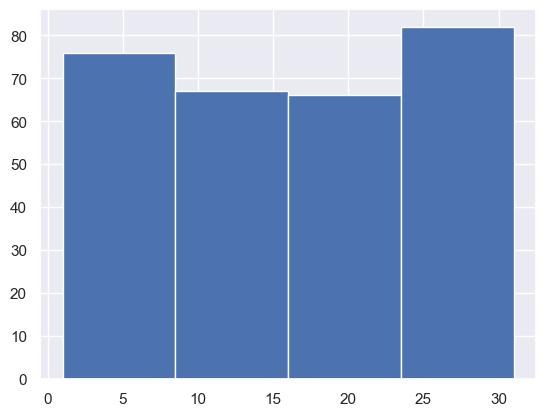

In [294]:
plt.hist(data3['date_operation_jour'][data3['montant']<0], bins=4)

Cela permet de voir comment son répartie les montants, dépenses et crédit, dans le mois.

In [295]:
data3

,date_operation,libelle,montant,solde_avt_ope,categ,date_operation_jour
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,31
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,3
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,3
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,3
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,3
...,...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE,5
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE,5
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE,6
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT,6


In [296]:
# on accède a la serie puis on détermine le masque, la condition de sélection

In [297]:
abs(data3['montant'][data3['montant']<0])

0       1.44
1      24.00
2      73.00
5      14.39
6      15.20
       ...  
303    10.64
304     4.80
305     1.92
306    10.00
307    13.58
Name: montant, Length: 291, dtype: float64

### Répartition des dépenses dans le mois en prenant en compte tous les mois
Chaque mois correspond à une couleur

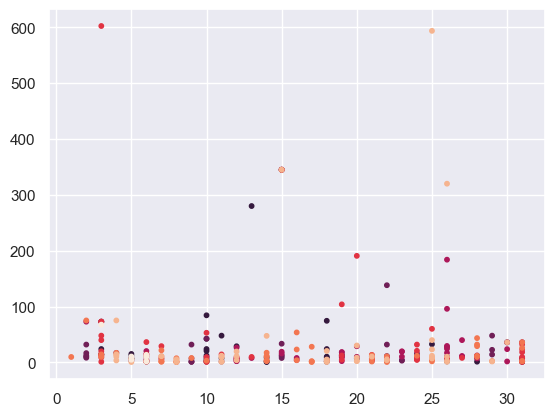

In [298]:
plt.scatter(x=data3['date_operation_jour'][data3['montant']<0], 
            y=abs(data3['montant'][data3['montant']<0]), 
            c=data3['date_operation'][data3['montant']<0].dt.month, 
            s=10)

## Représenter les variables sous forme de tableau

In [299]:
# création de la variable quart mois

In [300]:
data3['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data3["date_operation"].dt.day]

In [301]:
effectifs = data3["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data3) # len(data) renvoie la taille de l'échantillon

In [302]:
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

In [303]:
tab

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


## Les mesures de tendances centrales

In [304]:
data3['montant'].mode()

0   -1.6
Name: montant, dtype: float64

In [305]:
data3

,date_operation,libelle,montant,solde_avt_ope,categ,date_operation_jour,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,31,4
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,3,1
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,3,1
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,3,1
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,3,1
...,...,...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE,5,1
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE,5,1
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE,6,1
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT,6,1


In [306]:
data3['montant'].mean()

2.8725649350649407

In [307]:
data3['montant'].median()

-9.6

In [308]:
for categorie in data3['categ'].unique():
    print (categorie, ':', len(data3['categ'][data3['categ']==categorie]), 'éléments')
    montant_categorie=data3.loc[data3['categ']==categorie,'montant']
    print('mode :', montant_categorie.mode())
    print('moyenne :', montant_categorie.mean())
    print('médiane :', montant_categorie.median())

AUTRE : 212 éléments
mode : 0   -1.6
Name: montant, dtype: float64
moyenne : 23.433207547169832
médiane : -8.31
TRANSPORT : 21 éléments
mode : 0   -73.0
Name: montant, dtype: float64
moyenne : -52.99714285714286
médiane : -53.1
FACTURE TELEPHONE : 7 éléments
mode : 0   -7.02
1   -6.38
Name: montant, dtype: float64
moyenne : -12.045714285714283
médiane : -7.02
COURSES : 39 éléments
mode : 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
moyenne : -16.34128205128205
médiane : -12.24
COTISATION BANCAIRE : 7 éléments
mode : 0   -1.92
Name: montant, 

## Les mesures de dispersion

### La variance avec et sans biais

In [309]:
# 1/n*Somme(x-moyenne)²
data3['montant'].var()

31007.638040630973

In [310]:
data3['montant'].var(ddof=0)

30906.963891148403

### L'écart type --> s=√v

In [311]:
data3['montant'].std()

176.08985785851203

### CV=s/moyenne

In [312]:
data3['montant'].std()/data3['montant'].mean()

61.30056651079017

### Boite à moustache

{'whiskers': [<matplotlib.lines.Line2D at 0x18d424f2250>,
 'caps': [<matplotlib.lines.Line2D at 0x18d42545cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d424f2f10>],
 'medians': [<matplotlib.lines.Line2D at 0x18d42545460>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d42545fa0>],
 'means': []}

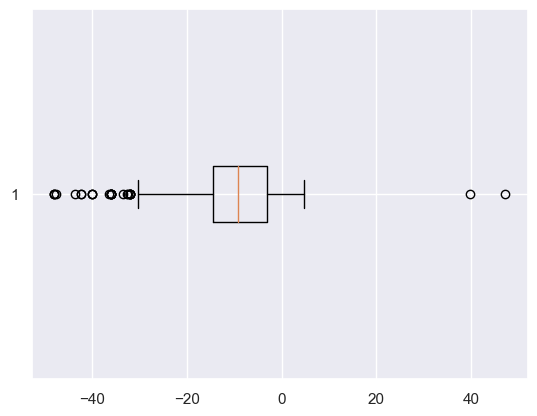

In [313]:
plt.boxplot(data3['montant'][abs(data3['montant'])<50], vert=False)

## Exercice

AUTRE : 212 éléments
mode : 0   -1.6
Name: montant, dtype: float64
moyenne : 23.433207547169832
médiane : -8.31
écart type : 201.47780984467025
variance : 40593.3078598051


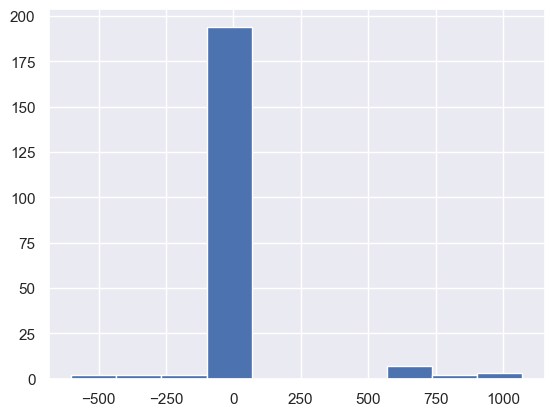

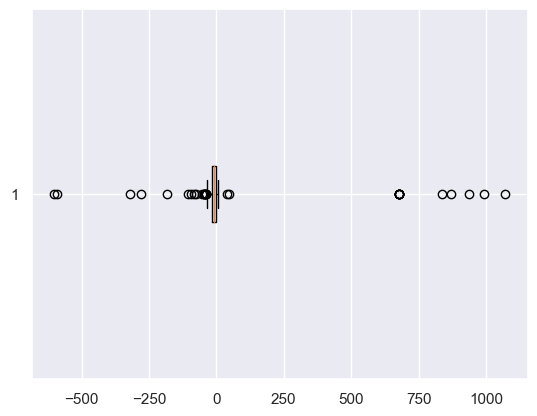

TRANSPORT : 21 éléments
mode : 0   -73.0
Name: montant, dtype: float64
moyenne : -52.99714285714286
médiane : -53.1
écart type : 48.11722884194987
variance : 2315.267711428572


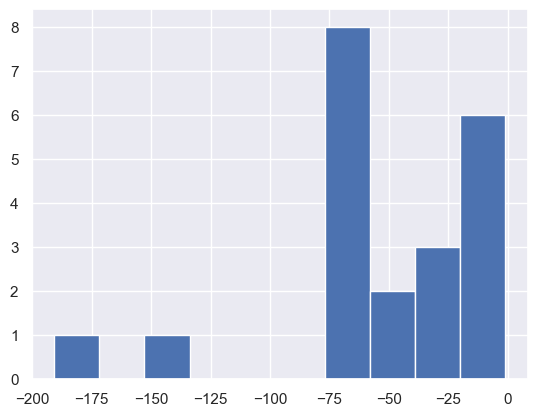

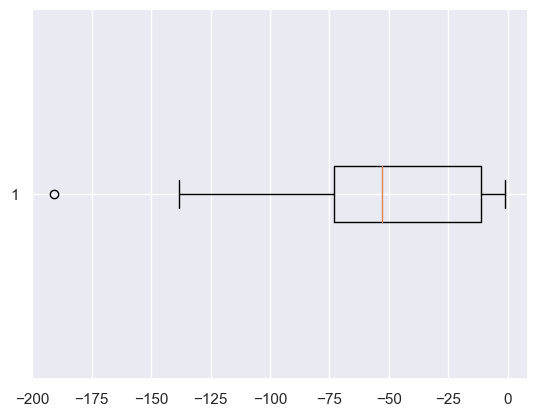

FACTURE TELEPHONE : 7 éléments
mode : 0   -7.02
1   -6.38
Name: montant, dtype: float64
moyenne : -12.045714285714283
médiane : -7.02
écart type : 11.068975949537
variance : 122.52222857142853


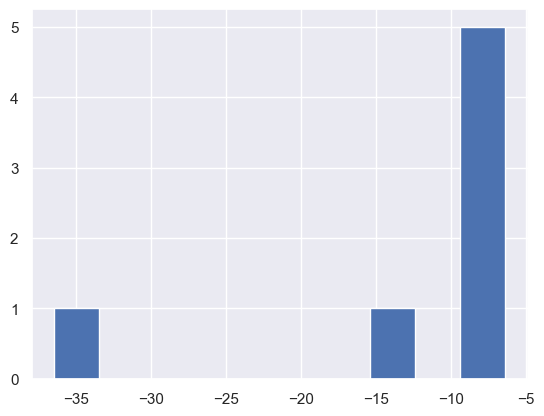

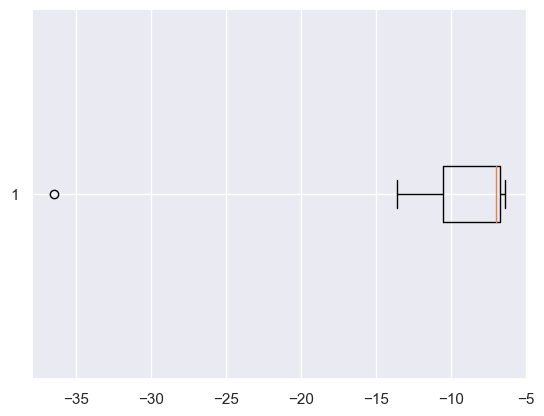

COURSES : 39 éléments
mode : 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
moyenne : -16.34128205128205
médiane : -12.24
écart type : 13.479017647222776
variance : 181.68391673414303


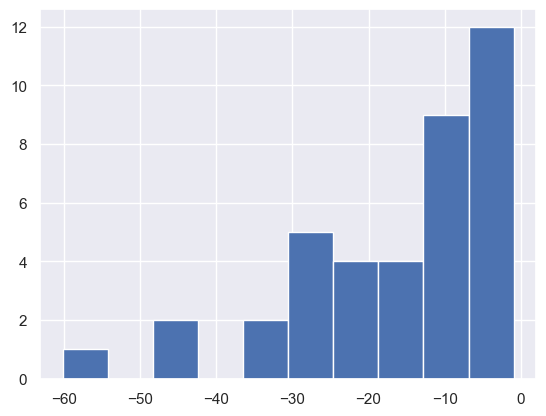

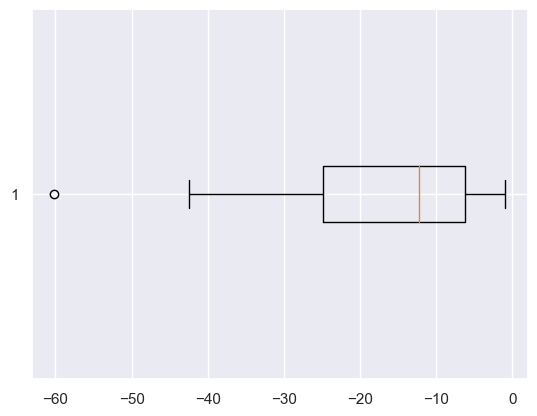

COTISATION BANCAIRE : 7 éléments
mode : 0   -1.92
Name: montant, dtype: float64
moyenne : -1.8857142857142857
médiane : -1.92
écart type : 0.04276179870598782
variance : 0.0018285714285714218


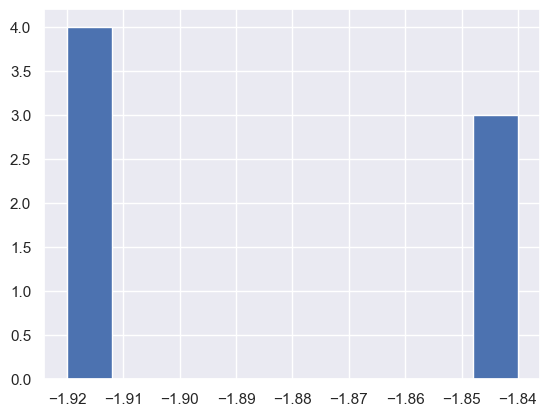

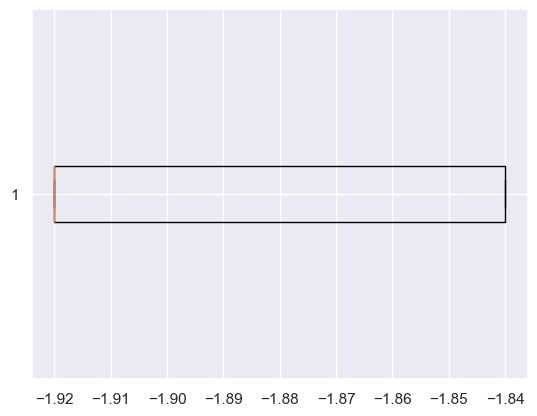

RESTAURANT : 16 éléments
mode : 0   -9.2
Name: montant, dtype: float64
moyenne : -10.332500000000001
médiane : -10.1
écart type : 1.7445362325462512
variance : 3.0434066666666677


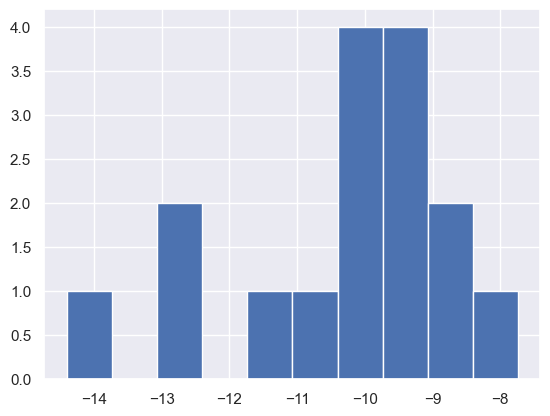

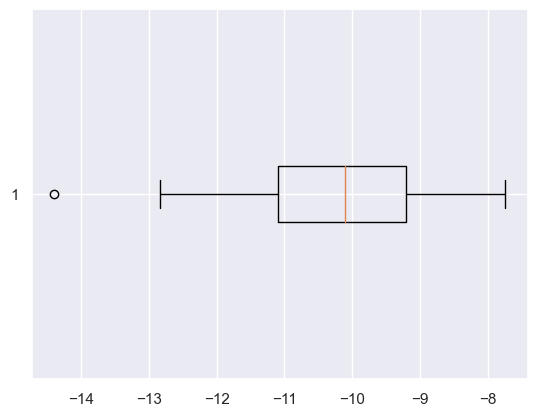

LOYER : 6 éléments
mode : 0   -345.0
Name: montant, dtype: float64
moyenne : -345.0
médiane : -345.0
écart type : 0.0
variance : 0.0


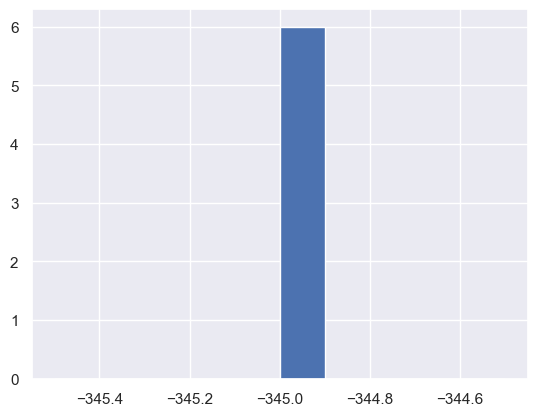

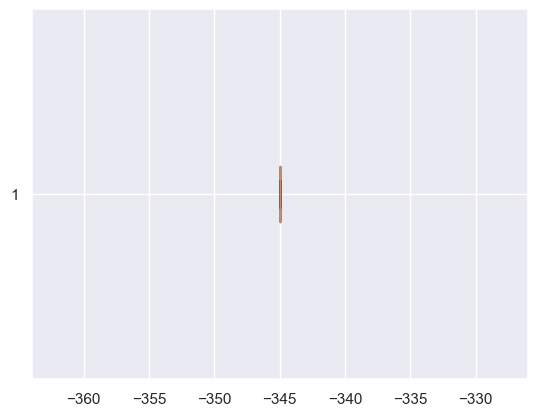

In [314]:
for categorie in data3['categ'].unique():
    print (categorie, ':', len(data3['categ'][data3['categ']==categorie]), 'éléments')
    montant_categorie=data3.loc[data3['categ']==categorie,'montant']
    print('mode :', montant_categorie.mode())
    print('moyenne :', montant_categorie.mean())
    print('médiane :', montant_categorie.median())
    print('écart type :', montant_categorie.std())
    print('variance :', montant_categorie.var())
    plt.hist(montant_categorie)
    plt.show()
    plt.boxplot(montant_categorie, vert=False)
    plt.show()

### Faire une boxplot par catégorie avec column et by

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'AUTRE'),
  Text(2, 0, 'COTISATION BANCAIRE'),
  Text(3, 0, 'COURSES'),
  Text(4, 0, 'FACTURE TELEPHONE'),
  Text(5, 0, 'LOYER'),
  Text(6, 0, 'RESTAURANT'),
  Text(7, 0, 'TRANSPORT')])

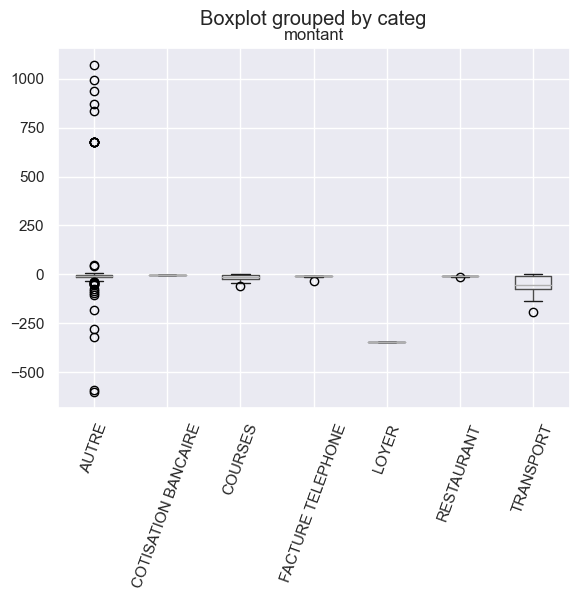

In [315]:
data3.boxplot(column='montant', by='categ')

plt.xlabel(None)

plt.xticks(rotation=70)

<AxesSubplot:>

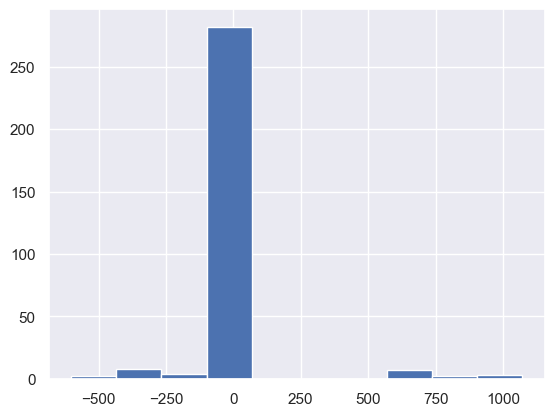

In [316]:
data3['montant'].hist()

## Les mesures de forme

In [317]:
data3['montant'].skew()

3.3618450105098843

Le skewness est >0 , étalé à droite, on a ainsi mode < mediane < moyenne

In [318]:
data3['montant'].kurtosis()

17.2719048282677

kurtosis très supérieur à 0, distribution bien plus concentré que la loi normal --> ici autour de 0

AUTRE : 212 éléments
mode : 0   -1.6
Name: montant, dtype: float64
moyenne : 23.433207547169832
médiane : -8.31
écart type : 201.47780984467025
variance : 40593.3078598051
skewness : 3.1215325222336423
kurtosis : 12.716537970826295


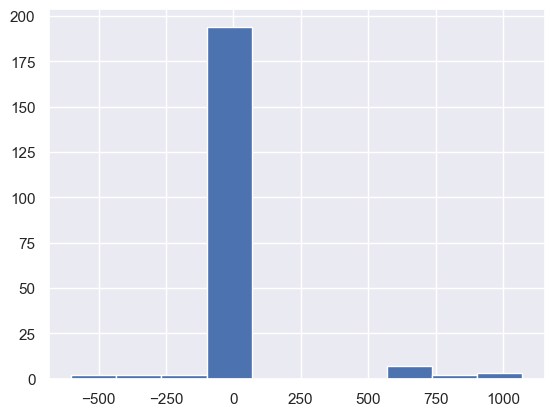

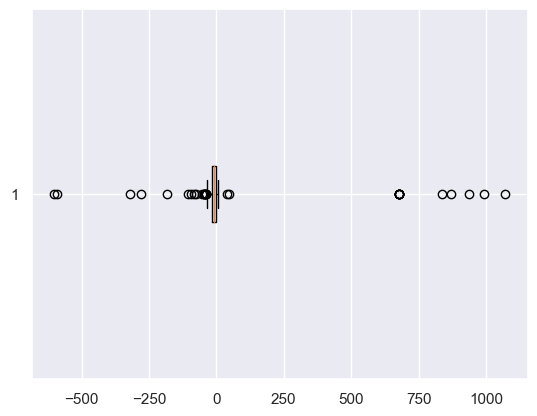

TRANSPORT : 21 éléments
mode : 0   -73.0
Name: montant, dtype: float64
moyenne : -52.99714285714286
médiane : -53.1
écart type : 48.11722884194987
variance : 2315.267711428572
skewness : -1.248265076217821
kurtosis : 2.1922705326917495


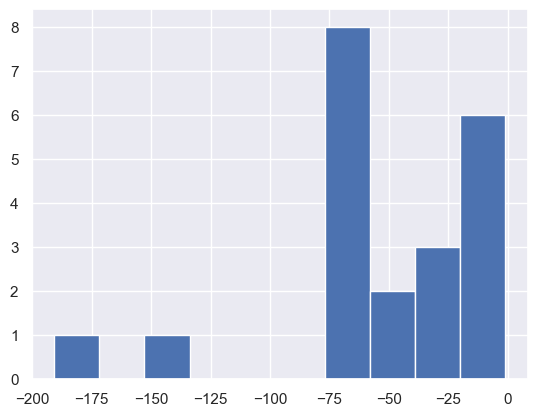

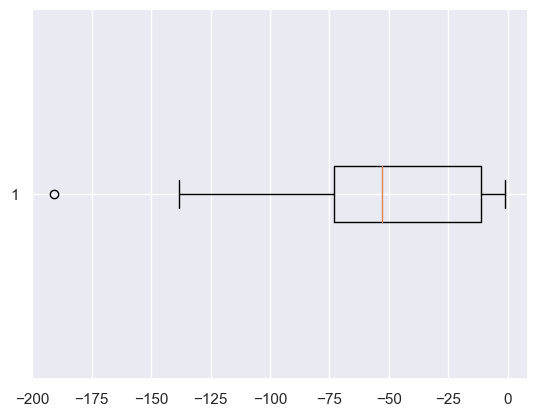

FACTURE TELEPHONE : 7 éléments
mode : 0   -7.02
1   -6.38
Name: montant, dtype: float64
moyenne : -12.045714285714283
médiane : -7.02
écart type : 11.068975949537
variance : 122.52222857142853
skewness : -2.3876514564281526
kurtosis : 5.798563367885492


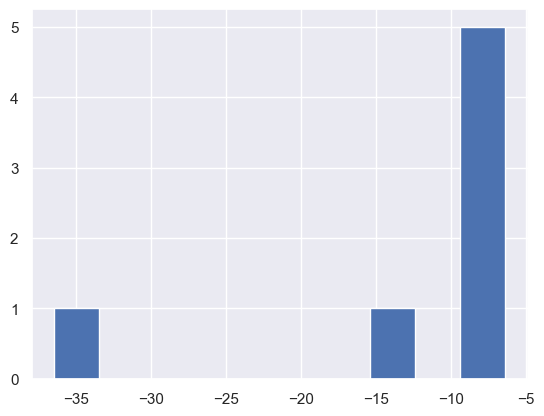

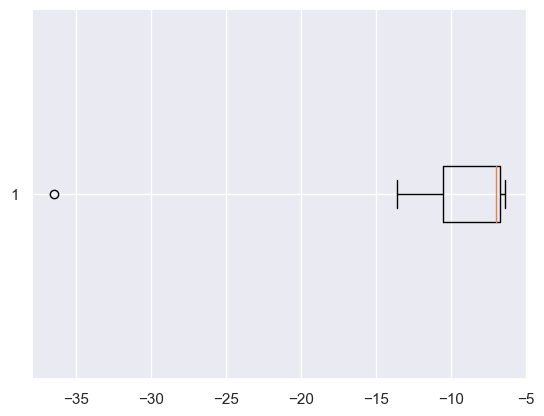

COURSES : 39 éléments
mode : 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
moyenne : -16.34128205128205
médiane : -12.24
écart type : 13.479017647222776
variance : 181.68391673414303
skewness : -1.2467488306456982
kurtosis : 1.6047304940874998


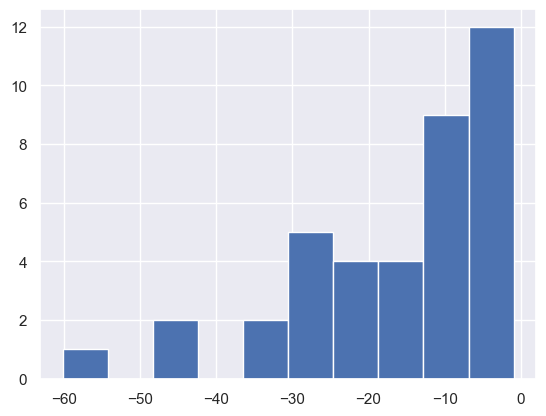

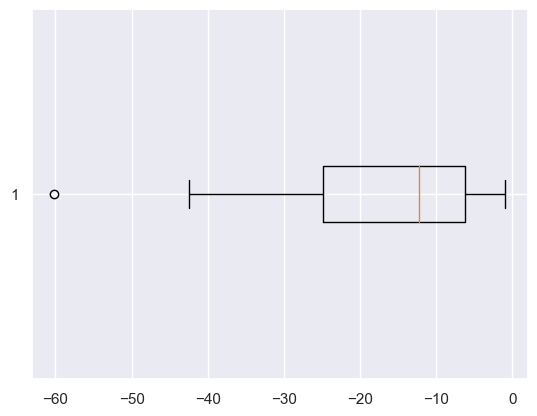

COTISATION BANCAIRE : 7 éléments
mode : 0   -1.92
Name: montant, dtype: float64
moyenne : -1.8857142857142857
médiane : -1.92
écart type : 0.04276179870598782
variance : 0.0018285714285714218
skewness : 0.37416573867739106
kurtosis : -2.800000000000003


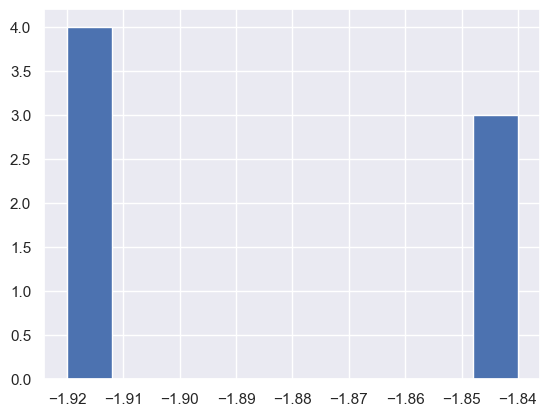

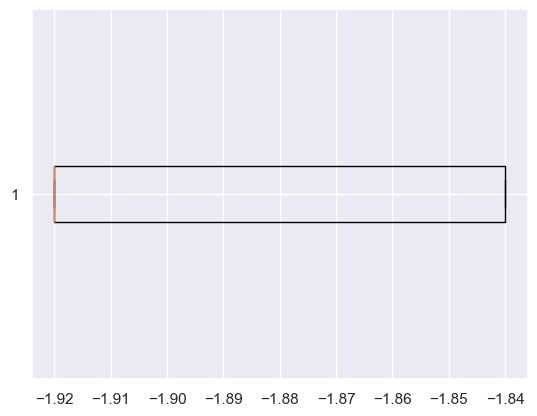

RESTAURANT : 16 éléments
mode : 0   -9.2
Name: montant, dtype: float64
moyenne : -10.332500000000001
médiane : -10.1
écart type : 1.7445362325462512
variance : 3.0434066666666677
skewness : -0.8883503487158837
kurtosis : 0.5988855591691937


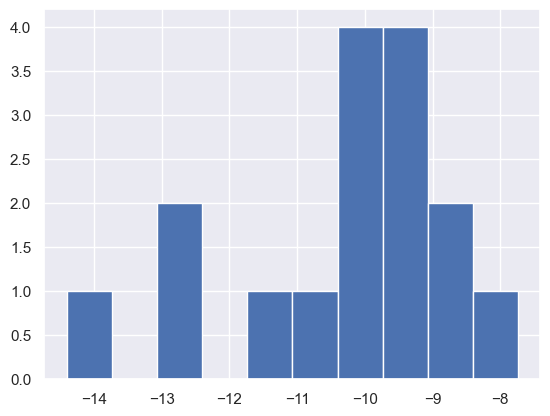

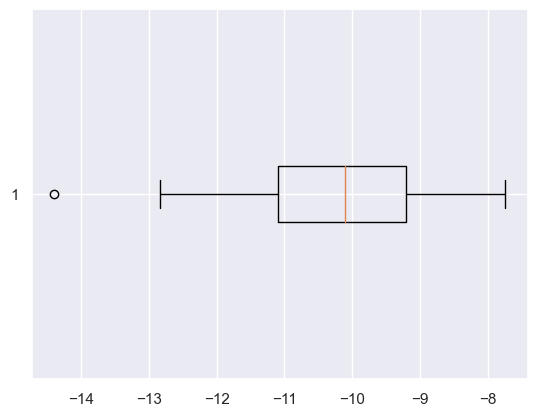

LOYER : 6 éléments
mode : 0   -345.0
Name: montant, dtype: float64
moyenne : -345.0
médiane : -345.0
écart type : 0.0
variance : 0.0
skewness : 0
kurtosis : 0


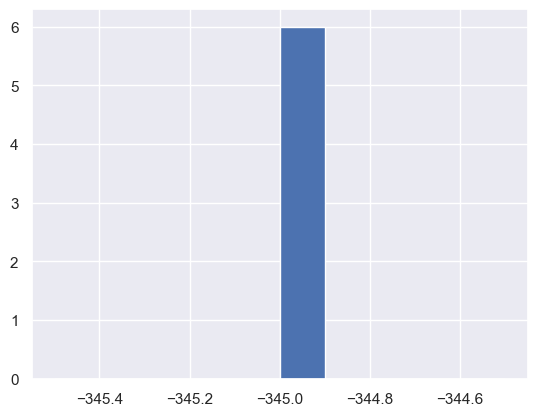

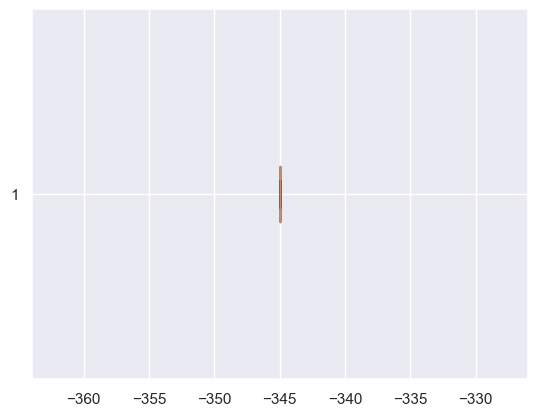

In [319]:
for categorie in data3['categ'].unique():
    print (categorie, ':', len(data3['categ'][data3['categ']==categorie]), 'éléments')
    montant_categorie=data3.loc[data3['categ']==categorie,'montant']
    print('mode :', montant_categorie.mode())
    print('moyenne :', montant_categorie.mean())
    print('médiane :', montant_categorie.median())
    print('écart type :', montant_categorie.std())
    print('variance :', montant_categorie.var())
    print('skewness :', montant_categorie.skew())
    print('kurtosis :', montant_categorie.kurtosis())
    plt.hist(montant_categorie)
    plt.show()
    plt.boxplot(montant_categorie, vert=False)
    plt.show()

## Les mesures de concentration
### Courbe de Lorenz

In [320]:
depense=-data3['montant'][data3['montant']<0]
depense.sort_values()

225      0.80
265      0.80
235      0.80
29       0.80
257      0.80
        ...  
220    345.00
70     345.00
111    345.00
288    593.60
152    602.27
Name: montant, Length: 291, dtype: float64

In [321]:
depense.sort_values().sum()

8648.43

In [322]:
proportion_depense=depense.sort_values()/depense.sort_values().sum()
proportion_depense

225    0.000093
265    0.000093
235    0.000093
29     0.000093
257    0.000093
         ...   
220    0.039892
70     0.039892
111    0.039892
288    0.068637
152    0.069639
Name: montant, Length: 291, dtype: float64

In [323]:
np.array(proportion_depense.cumsum())

array([9.25023386e-05, 1.85004677e-04, 2.77507016e-04, 3.70009354e-04,
       4.62511693e-04, 5.71201941e-04, 6.82204747e-04, 7.93207553e-04,
       9.04210360e-04, 1.02908852e-03, 1.15859179e-03, 1.28809506e-03,
       1.42569229e-03, 1.56444580e-03, 1.72632489e-03, 1.89282910e-03,
       2.05933331e-03, 2.22583752e-03, 2.39234173e-03, 2.55884594e-03,
       2.72535015e-03, 2.90226087e-03, 3.08726555e-03, 3.27227023e-03,
       3.45727490e-03, 3.64227958e-03, 3.82728426e-03, 4.01228894e-03,
       4.19729361e-03, 4.38229829e-03, 4.57655320e-03, 4.77312067e-03,
       4.97662582e-03, 5.18013096e-03, 5.39288634e-03, 5.60564172e-03,
       5.81839710e-03, 6.03809015e-03, 6.26009576e-03, 6.48210138e-03,
       6.70410699e-03, 6.92611260e-03, 7.15736845e-03, 7.38862429e-03,
       7.61988014e-03, 7.85229227e-03, 8.11592393e-03, 8.38418071e-03,
       8.66168773e-03, 8.93919474e-03, 9.21670176e-03, 9.49420878e-03,
       9.77171579e-03, 1.00492228e-02, 1.03313549e-02, 1.06146434e-02,
      

## Courbe de Lorenz des dépenses

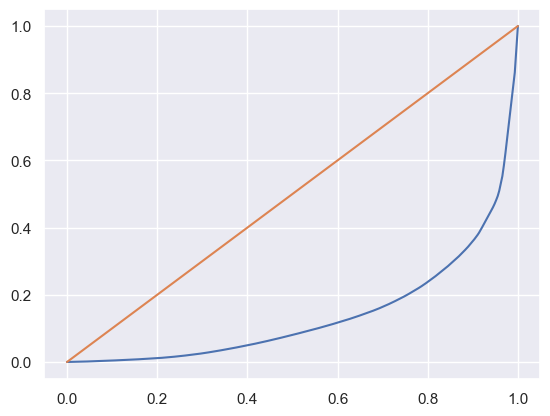

In [324]:
# la courbe de lorenz
n = np.array(proportion_depense.cumsum()).shape[0]
x = np.linspace(0,1,n)
y = np.array(proportion_depense.cumsum())
plt.plot(x,y)

# le première bissectrice
x1 = np.linspace(0,1,100)
y1 = x1
plt.plot(x1, y1)

La première bissectrice est la droite x=y
On voit ici que notre courbe ne la suit pas --> la répartition est inégalitaire 
--> Il y a des disparités dans les dépenses
ici environ 25% des dépenses représente 80% du total des sommes dépensées

proportion du nombre de dépenses en fonction de la proportion des sommes correspondantes

### Indice de Gini --> surface entre la courbe de lorenz et la bissectrice

In [325]:
AUC = (y.sum()-y[-1]/2 - y[0]/2)/n
# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7204389992513709

Plus Gini est proche de 1, plus la répartition de la variable est inégalitaire

## L'analyse bivariée

### Entre 2 variables quantitatives

In [329]:
depenses=data3[data3['montant']<0]

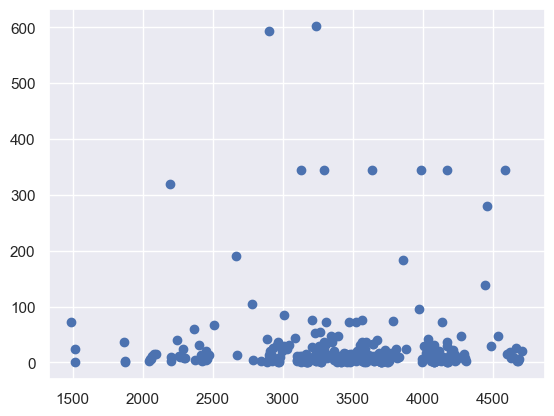

In [330]:
plt.scatter(depenses['solde_avt_ope'], -depenses['montant'])

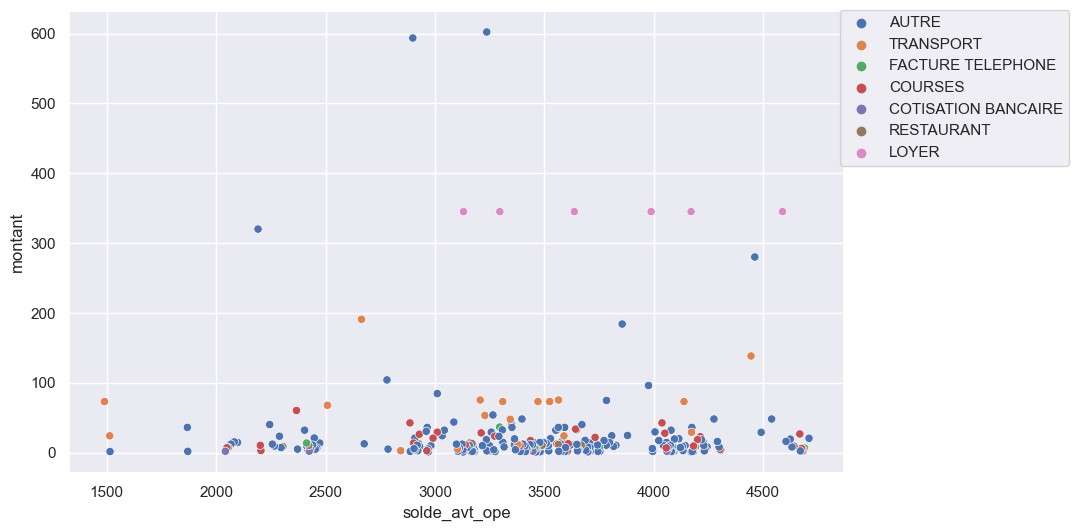

In [331]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=depenses, x='solde_avt_ope', y=depense, hue='categ')
plt.legend(bbox_to_anchor=(1.30, 1.019))

### Exercice refaire les boxplot

In [332]:
depenses.head(10)

,date_operation,libelle,montant,solde_avt_ope,categ,date_operation_jour,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,31,4
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,3,1
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,3,1
5,2023-04-03,CARTE XX XX XX XX,-14.39,2097.61,AUTRE,3,1
6,2023-04-05,CARTE XX XX XX XX XX,-15.20,2083.22,AUTRE,5,1
7,2023-04-05,CARTE XX XX XX XX,-12.00,2068.02,AUTRE,5,1
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE,5,1
9,2023-04-05,CARTE XX XX LES ANCIENS ROBINSON XX,-6.80,2049.00,COURSES,5,1
10,2023-04-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.84,2042.20,COTISATION BANCAIRE,6,1
12,2023-04-10,CARTE XX XX XX XX XX,-24.00,3033.16,AUTRE,10,2


In [333]:
depenses=depenses.copy()

### Discrétisation en 7 tranches de taille égales (en nombre de lignes dans chaque classe)

In [334]:
depenses['classe_solde']=pd.qcut(depenses['solde_avt_ope'], 7)
depenses.head(10)

,date_operation,libelle,montant,solde_avt_ope,categ,date_operation_jour,quart_mois,classe_solde
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,31,4,"(1489.809, 2861.46]"
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,3,1,"(1489.809, 2861.46]"
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,3,1,"(1489.809, 2861.46]"
5,2023-04-03,CARTE XX XX XX XX,-14.39,2097.61,AUTRE,3,1,"(1489.809, 2861.46]"
6,2023-04-05,CARTE XX XX XX XX XX,-15.20,2083.22,AUTRE,5,1,"(1489.809, 2861.46]"
7,2023-04-05,CARTE XX XX XX XX,-12.00,2068.02,AUTRE,5,1,"(1489.809, 2861.46]"
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE,5,1,"(1489.809, 2861.46]"
9,2023-04-05,CARTE XX XX LES ANCIENS ROBINSON XX,-6.80,2049.00,COURSES,5,1,"(1489.809, 2861.46]"
10,2023-04-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.84,2042.20,COTISATION BANCAIRE,6,1,"(1489.809, 2861.46]"
12,2023-04-10,CARTE XX XX XX XX XX,-24.00,3033.16,AUTRE,10,2,"(2861.46, 3148.137]"


<AxesSubplot:title={'center':'montant'}, xlabel='classe_solde'>

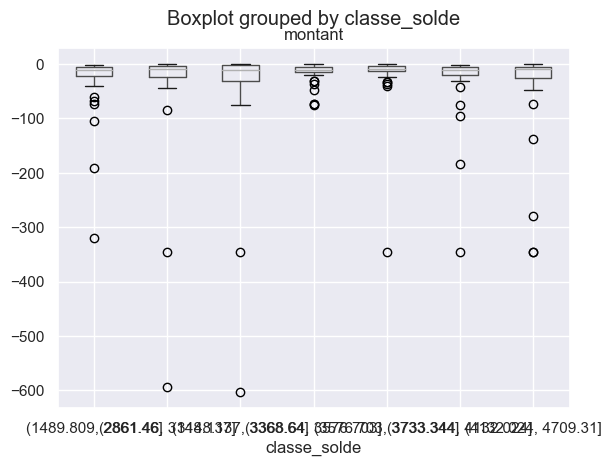

In [335]:
depenses.boxplot(column='montant', by='classe_solde')

### Discrétisation en 7 tranches de taille égales (en amplitude mais avec un nombre de lignes différentes)

In [336]:
depenses=depenses.copy()

In [337]:
depenses['classe_solde_2']=pd.cut(depenses['solde_avt_ope'], 7)

In [338]:
depenses['montant']=-depenses['montant']

In [339]:
depenses['solde_avt_ope'].value_counts(bins=7)

(3329.524, 3789.453]    97
(2869.596, 3329.524]    77
(3789.453, 4249.381]    54
(4249.381, 4709.31]     21
(1949.739, 2409.667]    18
(2409.667, 2869.596]    18
(1486.589, 1949.739]     6
Name: solde_avt_ope, dtype: int64

In [340]:
depenses['classe_solde_2'].cat.categories

IntervalIndex([(1486.59, 1949.739], (1949.739, 2409.667], (2409.667, 2869.596], (2869.596, 3329.524], (3329.524, 3789.453], (3789.453, 4249.381], (4249.381, 4709.31]], dtype='interval[float64, right]')

<Figure size 1500x900 with 0 Axes>

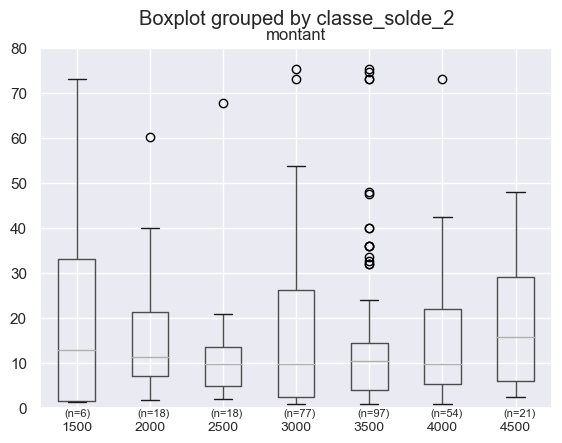

In [346]:
liste=[6,18,18,77,97,54,21]

plt.figure(figsize=(15,9))

depenses.boxplot(column='montant', by='classe_solde_2')

for categorie, n  in zip(range(7), liste):
    plt.text(categorie+0.83, -2, '(n={})'.format(n), size=8)

plt.xlabel(None)
plt.xticks(range(1,8), np.arange(1500,5000,500), size=10)
#plt.xticks(rotation=70, size=8)
plt.ylim(0,80)


plt.show()

On a pas exactement les mêmes résultats car le découpage n'est pas identique

### Correction, autre manière de faire

In [347]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
print(tranches)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
print(tranches)
# pour associer chaque valeur à l'indice de tranchen prends la valeur au dessus
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe
print(indices)

[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500.]
[ 250.  750. 1250. 1750. 2250. 2750. 3250. 3750. 4250. 4750.]
[3 3 3 4 4 4 4 4 4 6 6 6 6 6 6 6 6 7 9 9 9 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7 9 9
 9 9 9 9 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 7 7 7 7 6 6
 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 8
 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 5 4 4 4 4 4 4 4 5 5 5 5 5 5]


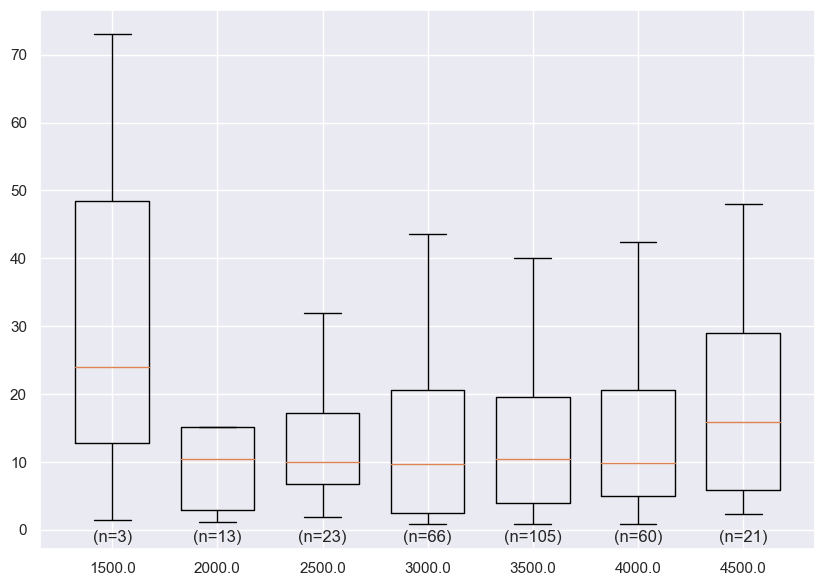

In [348]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

### La covariance empirique

sxy = 1/n * somme (xi-xmoyenne)*(yi-ymoyenne)
si corrélation xi et yi vont évoluer de la même manière 
--> si tous les 2 positifs --> positif
--> si tous les 2 négatifs --> positif
si corrélation sxy sera élevé si pas corrélation plutot proche de 0

### Le coefficient de corrélation linéaire ou coefficient de pearson

In [349]:
depenses.head()

,date_operation,libelle,montant,solde_avt_ope,categ,date_operation_jour,quart_mois,classe_solde,classe_solde_2
0,2023-03-31,DON XX XX XX XX XX XX XX,1.44,1515.25,AUTRE,31,4,"(1489.809, 2861.46]","(1486.59, 1949.739]"
1,2023-04-03,CARTE XX XX RAPT XX,24.00,1513.81,TRANSPORT,3,1,"(1489.809, 2861.46]","(1486.59, 1949.739]"
2,2023-04-03,CARTE XX XX RAPT XX,73.00,1489.81,TRANSPORT,3,1,"(1489.809, 2861.46]","(1486.59, 1949.739]"
5,2023-04-03,CARTE XX XX XX XX,14.39,2097.61,AUTRE,3,1,"(1489.809, 2861.46]","(1949.739, 2409.667]"
6,2023-04-05,CARTE XX XX XX XX XX,15.20,2083.22,AUTRE,5,1,"(1489.809, 2861.46]","(1949.739, 2409.667]"


In [350]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(depenses['solde_avt_ope'], depenses['montant'])[0])
print(np.cov(depenses['solde_avt_ope'], depenses['montant'])[1,0])

0.01006881913375919
486.6318158265189


## Régression linéaire

In [388]:
import datetime as dt

# Selection du sous-échantillon
courses = depenses[depenses.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    #print(days)
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    #print(r)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

In [352]:
courses.head(10)

,montant,attente
date_operation,,
2023-04-10,42.42,5
2023-04-25,32.67,15
2023-04-26,1.90,1
2023-04-28,9.11,2
2023-05-02,12.24,4
2023-05-04,17.16,2
2023-05-05,3.48,1
2023-05-10,42.45,5
2023-05-15,46.51,5


<AxesSubplot:xlabel='attente', ylabel='montant'>

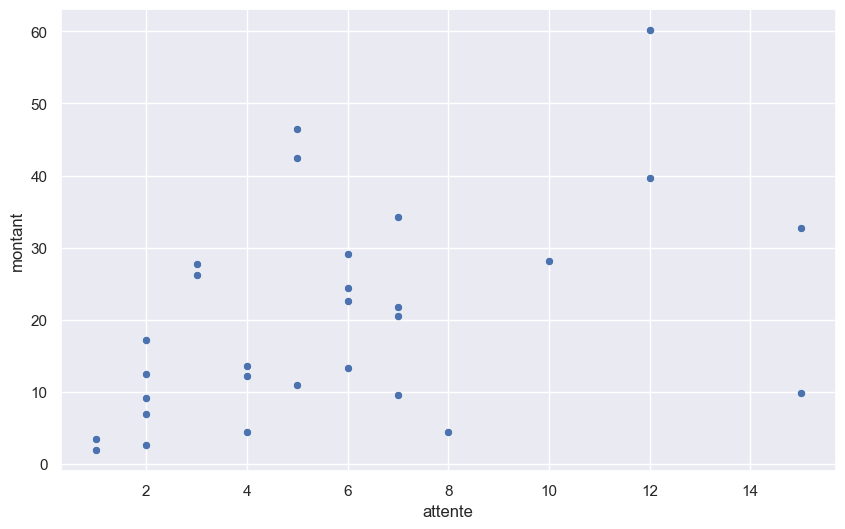

In [390]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=courses, x='attente', y='montant')

### Méthode des moindre carrés pour trouver a et b avec y=ax+b l'equation de droite de notre régression linéaire

In [391]:
import statsmodels.api as sm
Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

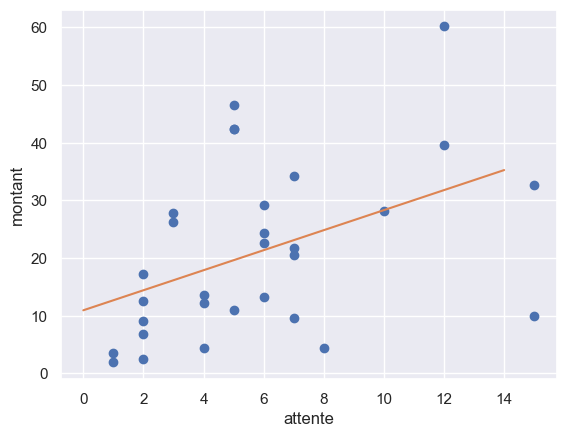

In [392]:
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

attente      3.030823
intercept    5.411480
dtype: float64


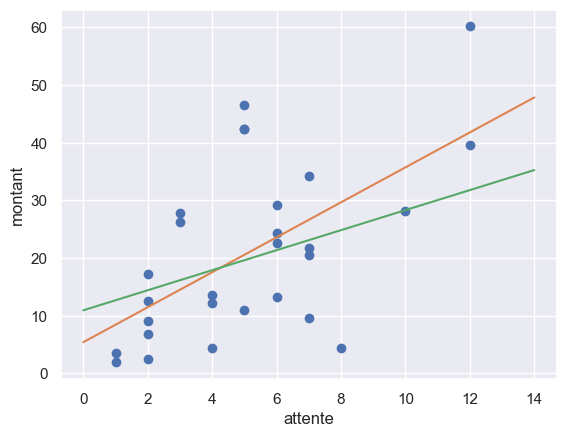

In [395]:
courses = courses.loc[courses['attente'] < 15, :]

Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a_new,b_new = result.params['attente'],result.params['intercept']

print(result.params)

plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a_new*x+b_new for x in np.arange(15)])
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

### Calcul du coefficient de détermination --> coefficient de pearson² (correlation lineaire)

In [394]:
print((st.pearsonr(courses['montant'], courses['attente'])[0])**2)

0.19512918747549216


## L'ANOVA, analyse entre une variable quantitative et qualitative

In [397]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data3[data3["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

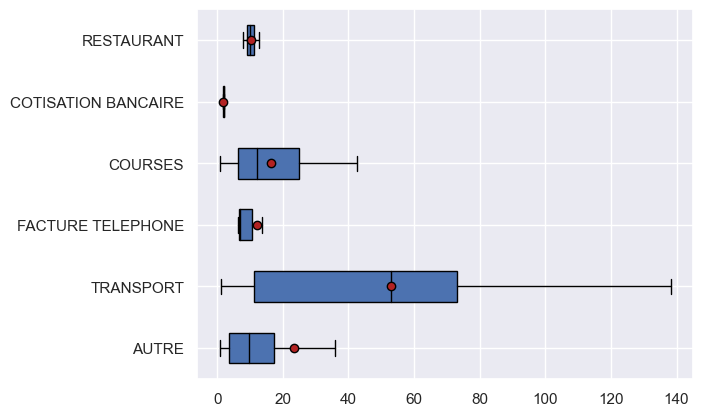

In [398]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [404]:
X = "categ" # qualitative
Y = "montant" # quantitative

sous_echantillon = data3[data3["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.39841890401094926

## CHI 2, analyse de la corélation entre 2 variables qualitatives

In [407]:
X = "quart_mois"
Y = "categ"

cont = data3[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308


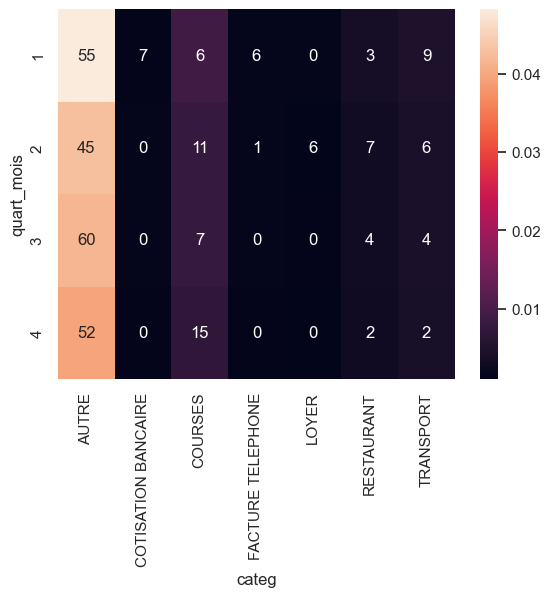

In [408]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()